# HEALTH INSURANCE CROSS SELL PREDICTION

## PROBLEM STATEMENT

An Insurance Company that has provided health insurance to its customers now they need to build a model to predict wether the policyholders(Customers) from past year will also be interested in vehicle Insurance by the company.

### Introduction about Insurance Policy
An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

### Way Forward
Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, I have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## DATA DESCRIPTION
-   **TRAIN DATA SET**

| Variable            | Definition           |
| :-----------------  |-------------:| 
| `id`                | Unique ID for the customer |
| `Gender`            | Gender of the customer      | 
| `Age`               | Age of the customer      |
| `Driving_License`   | 0 : Customer does not have DL, 1 : Customer already has DL      |
| `Region_Code`       |Unique code for the region of the customer      |
| `Previously_Insured`| 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance      |
| `Vehicle_Age`       | Age of the Vehicle      |
| `Vehicle_Damage`    | 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle                               damaged in the past.      |
| `Annual_Premium`    | The amount customer needs to pay as premium in the year      |
| `PolicySalesChannel`| Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over                        Phone, In Person, etc.      |
| `Vintage`           | Number of Days, Customer has been associated with the company      |
| `Response`          | 1 : Customer is interested, 0 : Customer is not interested      |


-   **TEST DATA SET**
 
| Variable            | Definition           |
| :-----------------  |-------------:| 
| `id`                | Unique ID for the customer |
| `Gender`            | Gender of the customer      | 
| `Age`               | Age of the customer      |
| `Driving_License`   | 0 : Customer does not have DL, 1 : Customer already has DL      |
| `Region_Code`       |Unique code for the region of the customer      |
| `Previously_Insured`| 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance      |
| `Vehicle_Age`       | Age of the Vehicle      |
| `Vehicle_Damage`    | 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle                               damaged in the past.      |
| `Annual_Premium`    | The amount customer needs to pay as premium in the year      |
| `PolicySalesChannel`| Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over                        Phone, In Person, etc.      |
| `Vintage`           | Number of Days, Customer has been associated with the company      |


-   **SUBMISSION**

| Variable            | Definition           |
| :-----------------  |-------------:| 
| `id`                | Unique ID for the customer |
| `Response`          | 1 : Customer is interested, 0 : Customer is not interested      |


## APPROACH

-  **STEP 1 : IMPORT RELEVANT LIBRARIES**
-  **STEP 2 : DATA INSPECTION & CLEANING**
-  **STEP 3 : EXPLORATORY DATA ANALYSIS**
-  **STEP 4 : FEATURE SELECTION**
-  **STEP 5 : SETTING UP VALIDATION STRATEGY**
-  **STEP 6 : BUILDING MODEL**
-  **STEP 7 : PREDICTIONS**

### STEP 1 : IMPORT RELEVENT LIBRARIES

In [35]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

#Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

#Validation & Model Building Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV


#Visualization Libraries
import matplotlib as mpl

#Save & Load ML Model
import pickle

#Other Libraries
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


### STEP 2 : DATA INSPECTION & CLEANING

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((381109, 12), (127037, 11))

In [3]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Ratio of Null Values in Percentage
(train.isnull().sum()/train.shape[0]) * 100

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [5]:
(test.isnull().sum()/test.shape[0]) * 100

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
dtype: float64

#### We Dont have any null values.

In [6]:
#Categorical Features in Dataset
categorical = train.select_dtypes(include=[np.object])
print('Categorical Features in Train Dataset: {}'.format(categorical.shape[1]))

numerical = train.select_dtypes(include=[np.int64, np.float64])
print('Numerical Features in Train Dataset: {}'.format(numerical.shape[1]))


Categorical Features in Train Dataset: 3
Numerical Features in Train Dataset: 9


In [7]:
#Categorical Features in Dataset
categorical = test.select_dtypes(include=[np.object])
print('Categorical Features in Test Dataset: {}'.format(categorical.shape[1]))

numerical = test.select_dtypes(include=[np.int64, np.float64])
print('Numerical Features in Test Dataset: {}'.format(numerical.shape[1]))


Categorical Features in Test Dataset: 3
Numerical Features in Test Dataset: 8


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


-   **Gender, Vehicle Age, Vehicle Damage are in Categorical Values**

In [9]:
train.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
train.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [11]:
train.Vehicle_Damage.unique()

array(['Yes', 'No'], dtype=object)

### STEP 3 : EXPLORATORY DATA ANALYSIS

In [12]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<AxesSubplot:xlabel='Response', ylabel='count'>

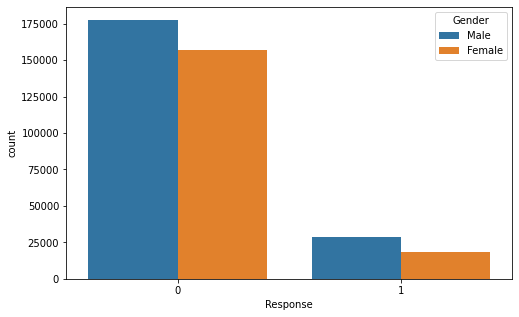

In [13]:
plt.figure(figsize=(8,5))
sns.countplot('Response',hue='Gender',data = train)

In [14]:
train.Age.describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Response', ylabel='Age'>

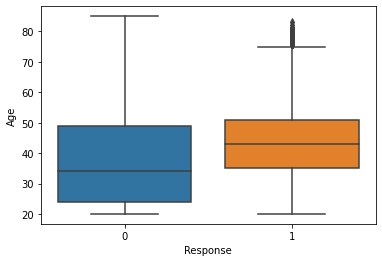

In [15]:
sns.boxplot(x= 'Response',y='Age',data = train)

__Ages Between 35 to 50 are more likely to buy vehicle Insurance__

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Age'>

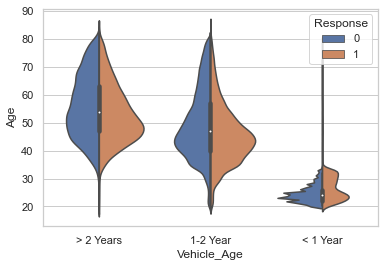

In [16]:
sns.set_theme(style="whitegrid")
sns.violinplot(data = train, x = 'Vehicle_Age', y = 'Age', hue = 'Response',split=True)

__Change in Average Age of Person More Likely to buy vehicle Insurance changes as per the Vehicle's Age__

In [17]:
train.Driving_License.value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

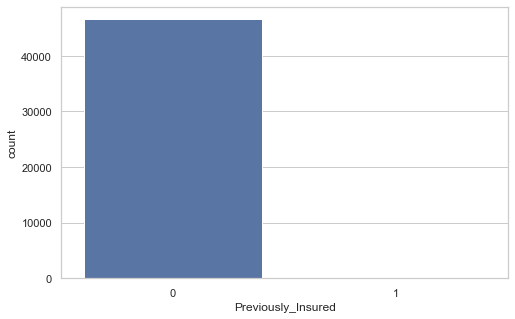

In [18]:
plt.figure(figsize=(8,5))
sns.countplot('Previously_Insured',data = train[train['Response']==1])

__Almost Everyone who are interested in vehicle insurance didn't had their vehicle insured in previous year__

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

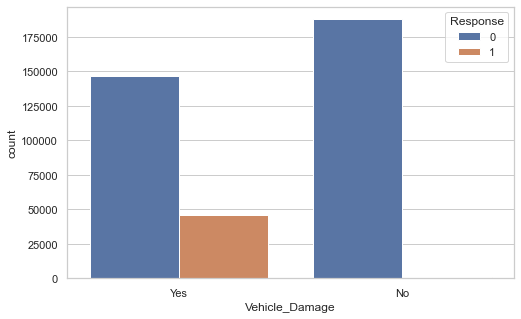

In [19]:
plt.figure(figsize=(8,5))
sns.countplot('Vehicle_Damage',data = train,hue='Response',)

__Damaged Vehicles are more likely to buy Vehicle Insurance__

<AxesSubplot:xlabel='Annual_Premium'>

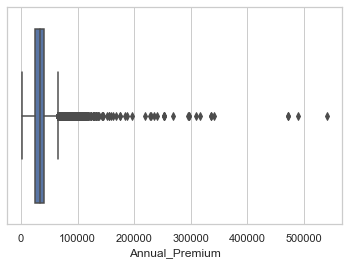

In [20]:
sns.boxplot('Annual_Premium',data=train[train['Response']==1])

__Annual Premium Does Have too many Outliers__

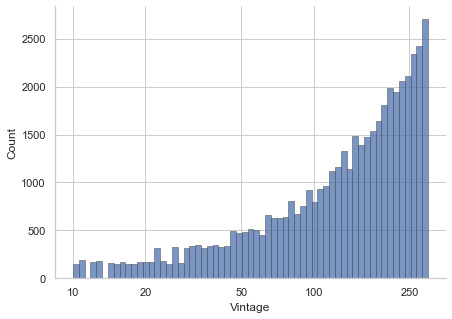

In [21]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(train[train['Response']==1], x='Vintage',multiple='stack',palette='light:m_r',edgecolor='.3',linewidth=.5,log_scale=True)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([ 10, 20, 50, 100,250])


__As the number of association days increases customers are more likely to buy vehicle insurance__

<AxesSubplot:>

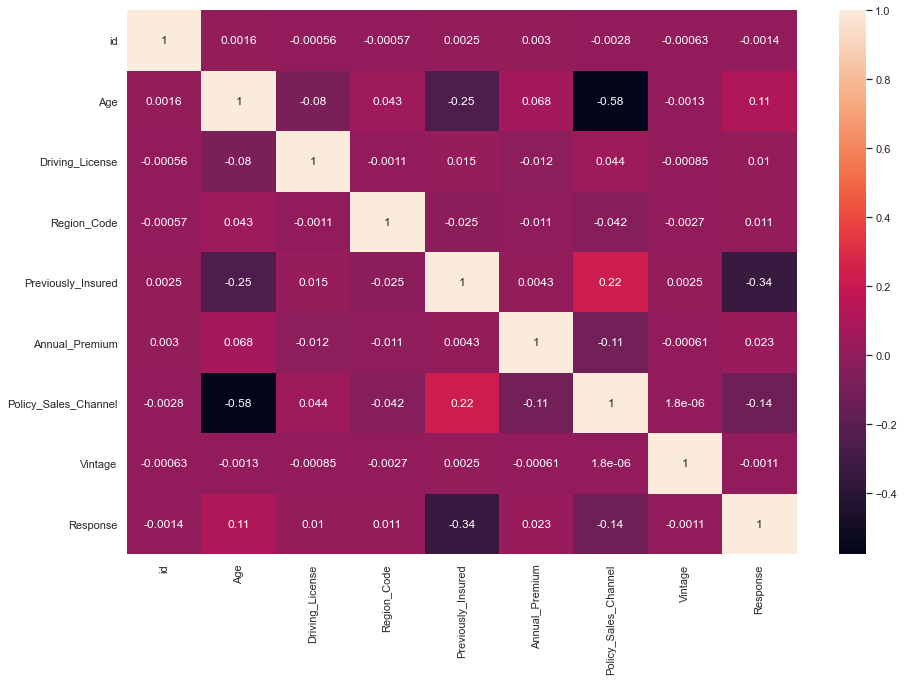

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

### STEP 4 : FEATURE SELECTION

In [23]:
#Encoding Categorical Labels
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [24]:
X = train.drop(columns=['id','Response'],axis =1)
y = train['Response']

In [25]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [26]:
X_test = test.drop(columns=['id'],axis =1)

In [48]:
def scale_data(X_train, X_val, X_test):
    """
    Input: Features (numpy arrays)
    Output: Scaled data
    """
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    pickle.dump(scaler,open('scaler.pkl','wb'))
    return X_train_scaled, X_val_scaled, X_test_scaled
  
X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_train, X_valid, X_test)

### Step 5 : Setting Up Validation Stratergy

 __To Validate Results we will use ROC Score as well as Accuracy Score__

In [28]:
def model_score(model_name, model, X_train_scaled, X_val_scaled, y_train, y_val, test=False):
    """
    Input: Transformed feature and target sets
    Output: Validation scores. If test=True, includes test scores
    """
    print('Calculating validation score...')

    my_model = model
    my_model.fit(X_train_scaled,y_train)
    print(f'{model_name} accuracy score: {my_model.score(X_val_scaled,y_val):.4}\n')
    print('ROC', roc_auc_score(y_valid,my_model.predict_proba(X_val_scaled).T[1]))

    if test:
        print("Calculating test score...")
        print(f'{model_name} accuracy score: {my_model.score(X_test_scaled,y_test):.4}\n')

    return my_model
  
knn = model_score('KNN', KNeighborsClassifier(n_neighbors=5),
                       X_train_scaled,X_val_scaled, y_train, y_valid,test=False)

lr = model_score('LogReg', LogisticRegression(penalty='none'),
                       X_train_scaled,X_val_scaled, y_train, y_valid,test=False)

rf = model_score('RF', RandomForestClassifier(),
                       X_train_scaled,X_val_scaled, y_train, y_valid,test=False)
        
gbm = model_score('XGBoost', XGBClassifier(),
                       X_train_scaled,X_val_scaled, y_train, y_valid,test=False)

Calculating validation score...
KNN accuracy score: 0.8558

ROC 0.7549823060216414
Calculating validation score...
LogReg accuracy score: 0.8768

ROC 0.8179205641893089
Calculating validation score...
RF accuracy score: 0.8666

ROC 0.8345215909273437
Calculating validation score...
[02:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 0.8764

ROC 0.8543366596208813


__XGBoost Classifier is the best classifier in this scenario__

### Step 6 : Building Model

In [29]:
bootstrap = [True, False]
max_features = ['auto','sqrt']
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]
n_estimators = [200, 400, 500, 700]
max_depth = [4,6,10,12, None]

# Specify "parameter distributions" rather than a "parameter grid"

param_dist = dict(n_estimators=n_estimators, max_depth = max_depth, bootstrap=bootstrap,
                  min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,
                  max_features=max_features)

rand = RandomizedSearchCV(XGBClassifier(), param_dist, cv=10, scoring='accuracy',
                          n_iter=10, random_state=42)

rand.fit(X_train_scaled, y_train)
print(rand.best_params_)

[02:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[02:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[02:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:42:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[03:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[03:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[03:41:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:41:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[03:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:56:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[04:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[04:29:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:29:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[04:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

In [52]:
gbm2 = model_score('RF', RandomForestClassifier(n_estimators=400,min_samples_split=5,
                                            min_samples_leaf=4,max_features='sqrt',
                                            max_depth=4, bootstrap=True),
                       X_train_scaled,X_val_scaled, y_train, y_valid,test=False)

Calculating validation score...
RF accuracy score: 0.8768

ROC 0.8431943588207953


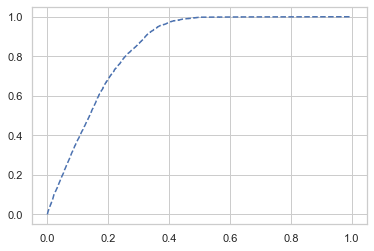

In [53]:
from sklearn.metrics import roc_curve

y_prob = gbm2.predict_proba(X_val_scaled)

fpr,tpr,thresholds = roc_curve(y_valid,y_prob[:, 1])

plt.plot(fpr, tpr, linestyle='--', label='No Skill')

### Saving & Loading Model using Pickle

In [54]:
filename = 'cross_sell_model.pkl'
pickle.dump(gbm2, open(filename,'wb'))

In [66]:
loaded_model = pickle.load(open(filename,'rb'))
y_test = loaded_model.predict_proba(X_test_scaled)

y_test[:,1]

array([0.00280342, 0.27542862, 0.28698539, ..., 0.00250131, 0.00466385,
       0.00802434])

In [64]:
score = loaded_model.score(X_val_scaled,y_valid)
score

0.8768072210123061